In [2]:
import numpy as np
import matplotlib.pyplot as plt
import PhysicsFunctions as phy


#------- INITIAL DATA ------------
pinhole_diam_mm = [0.2, 0.4] #mm
pinhole_diam = np.array(pinhole_diam_mm) *10**(-3)

pinhole_to_target_cm = 109.55 #cm
pinhole_to_target = pinhole_to_target_cm *10**(-2)
pinhole_to_target_unc = 0.00005 #m

laser_wavelength_nm = 633 #nm
laser_wavelength = laser_wavelength_nm * (10**(-9))

# 1 and 2 correspond to pinhole diam 0.2mm but the two separate measurements we did.

central_diam1 = (7+7.5)/2 #Averaged over two measurements 
central_radius1_mm = central_diam1/2 #This is the radius of the bright spot at the center of the pattern.
central_radius1 = central_radius1_mm*10**(-3)
central_rad_unc = 0.0005 #m
fringe_dist1_mm = [0,1,3,4,5.5,6.5,8.5,10,12,13,15,16,18,19.5,21.5,23,25,26] #mm [lower,upper,lower2,upper2,...] #9 fringes
fringe_dist1 = np.array(fringe_dist1_mm)*10**(-3)
fringe_unc = 0.0005 #m
mean_fringe_dist1 = [(fringe_dist1[i]+fringe_dist1[i+1])/2 for i in range(0,len(fringe_dist1),2)]
mean_fringe_dist1 = np.array(mean_fringe_dist1)





### IGNORE RUN 2 INACCURATE MEASUREMENTS
'''
fringe_dist2_mm = [0,1,3,4,5.5,6.5,8,9.5,10.5,12,13.5,15,17,18]
fringe_dist2 = np.array(fringe_dist2_mm) *10**(-3)
mean_fringe_dist2 = [(fringe_dist2[i]+fringe_dist2[i+1])/2 for i in range(0,len(fringe_dist2),2)]
'''

# Pinhole diam 0.4mm

central_diam2 = 3.5 #mm
central_radius2_mm = central_diam2/2
central_radius2 = central_radius2_mm*10**(-3)
fringe_dist3_mm = [0,1,2,3,4,5,6,6.7,7.7,8.7,9.7,10.7] # 6 fringes
fringe_dist3 = np.array(fringe_dist3_mm) *10**(-3)
mean_fringe_dist3 = [(fringe_dist3[i]+fringe_dist3[i+1])/2 for i in range(0,len(fringe_dist3),2)]
mean_fringe_dist3 = np.array(mean_fringe_dist3)

print(mean_fringe_dist1, mean_fringe_dist3)

#3-Zone Fresnel 

central_diam3 = 4
central_radius3_mm = central_diam3/2 #mm
central_radius3 = central_radius3_mm*10**(-3)
fringe_dist4_mm = [0,1,3,3.5,6,7,8,8.5,10,10.5,12,13,14.5,16,18,19] # 6 fringes
fringe_dist4 = np.array(fringe_dist3_mm) *10**(-3)
mean_fringe_dist4 = [(fringe_dist4[i]+fringe_dist4[i+1])/2 for i in range(0,len(fringe_dist4),2)]

[0.0005  0.0035  0.006   0.00925 0.0125  0.0155  0.01875 0.02225 0.0255 ] [0.0005  0.0025  0.0045  0.00635 0.0082  0.0102 ]


In [3]:

#------- Calculate Theta ---------
#Due to small angle approximations we can say that sin(theta) ~= tan(theta) and we can use the fringe distances
#and the pinhole-to-target distance to obtain theta

theta1 = (mean_fringe_dist1+central_radius1)/pinhole_to_target
theta3 = (mean_fringe_dist3+central_radius2)/pinhole_to_target



#------- Pinhole Diameter Calculations ---------
#------- 
pinhole_diam_c1 = (1.22 * laser_wavelength / theta1)
pinhole_diam_c3 = (1.22 * laser_wavelength / theta3)
print(pinhole_diam_c1)
print(pinhole_diam_c3)

pinhole_diam_c1_mm = pinhole_diam_c1*1000 #Millimeter calculations
pinhole_diam_c3_mm = pinhole_diam_c3*1000
print(pinhole_diam_c1_mm[0])
print(pinhole_diam_c3_mm[0])
print()

ph_stdev1_mm = np.std(pinhole_diam_c1_mm) 
ph_stdev3_mm = np.std(pinhole_diam_c3_mm) 
ph_mean1_mm = np.mean(pinhole_diam_c1_mm)
ph_mean3_mm = np.mean(pinhole_diam_c3_mm)



[2.05093535e-04 1.18738362e-04 8.78972291e-05 6.57095790e-05
 5.24657879e-05 4.42358604e-05 3.78105399e-05 3.26960707e-05
 2.90475821e-05]
[3.76004813e-04 1.99061372e-04 1.35361733e-04 1.04445781e-04
 8.50262141e-05 7.07958854e-05]
0.2050935345454545
0.37600481333333324



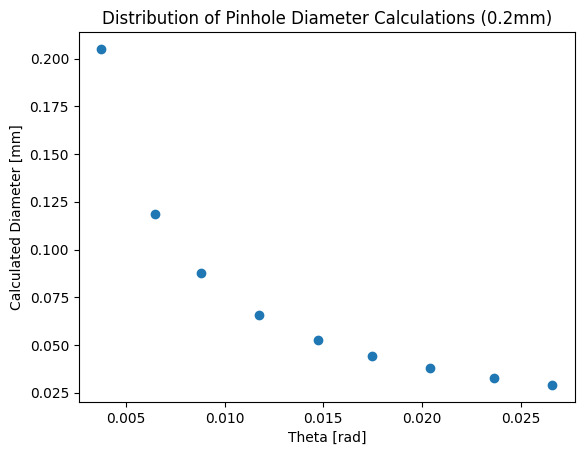

In [4]:
#Create plot to represent data for 0.2mm pinhole

fig, ax = plt.subplots()
fig.suptitle(None)
ax.set_title("Distribution of Pinhole Diameter Calculations (0.2mm)")
ax.set_ylabel("Calculated Diameter [mm]")
ax.set_xlabel("Theta [rad]")

plt.scatter(theta1,pinhole_diam_c1_mm)



plt.show()

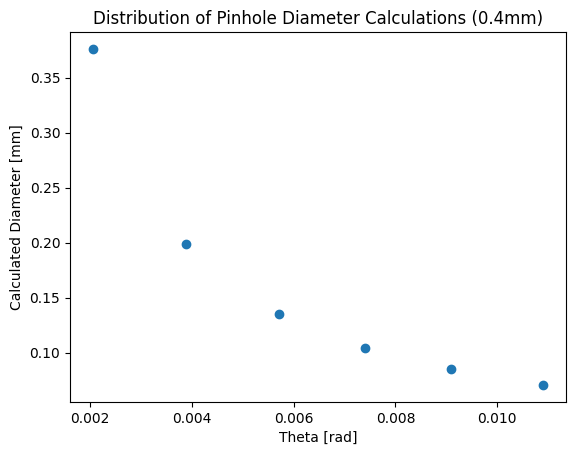

In [5]:
#Create plot to represent data for 0.4mm pinhole

fig, ax = plt.subplots()
fig.suptitle(None)
ax.set_title("Distribution of Pinhole Diameter Calculations (0.4mm)")
ax.set_ylabel("Calculated Diameter [mm]")
ax.set_xlabel("Theta [rad]")

plt.scatter(theta3,pinhole_diam_c3_mm)

plt.show()

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 9
    # variables        = 2
    chi-square         = 9.7575e-40
    reduced chi-square = 1.3939e-40
    Akaike info crit   = -824.203309
    Bayesian info crit = -823.808860
    R-squared          = 1.00000000
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a:  7.7226e-07 (init = 0)
    b:  8.6413e-21 (init = 0)
7.7226e-07


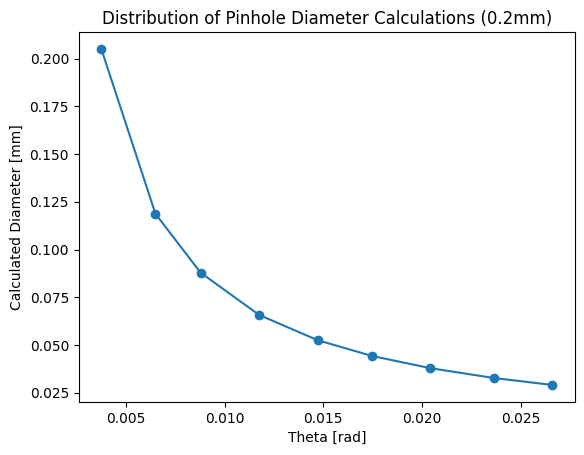

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 6
    # variables        = 2
    chi-square         = 2.0204e-39
    reduced chi-square = 5.0510e-40
    Akaike info crit   = -541.335752
    Bayesian info crit = -541.752233
    R-squared          = 1.00000000
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a:  7.7226e-07 (init = 0)
    b: -1.9302e-20 (init = 0)


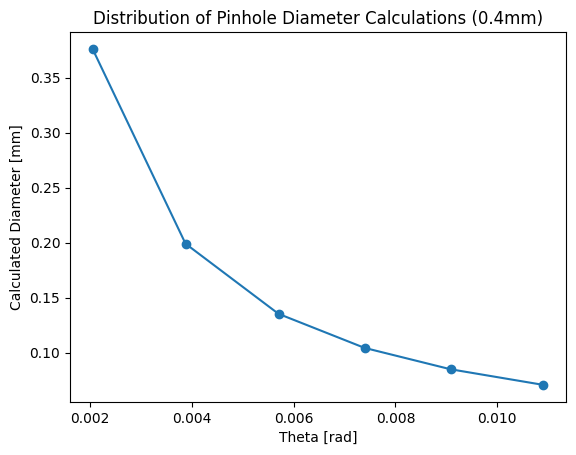

In [6]:
import lmfit

def fitReciprocal(iX,iY,iA = 0, iB = 0):
                  
    #Define a reciprocal function
    def recipFunc(x,a,b):
        result = a/x+b
        return result
    
    #Create fit
    model = lmfit.Model(recipFunc) 
    p = model.make_params(a=iA,b=iB) 
    result = model.fit(data=iY,params=p,x=iX) 
    output = model.eval(params=result.params,x=iX) 
    
    lmfit.report_fit(result) #Necessary to show results.
    return output,result

output1,result = fitReciprocal(theta1,pinhole_diam_c1)

print(1.22*laser_wavelength)


#Create plot to represent data for 0.2mm pinhole

fig, ax = plt.subplots()
fig.suptitle(None)
ax.set_title("Distribution of Pinhole Diameter Calculations (0.2mm)")
ax.set_ylabel("Calculated Diameter [mm]")
ax.set_xlabel("Theta [rad]")

plt.scatter(theta1,pinhole_diam_c1_mm)
plt.plot(theta1,output1*1000)



plt.show()


output3,result = fitReciprocal(theta3,pinhole_diam_c3)
fig, ax = plt.subplots()
fig.suptitle(None)
ax.set_title("Distribution of Pinhole Diameter Calculations (0.4mm)")
ax.set_ylabel("Calculated Diameter [mm]")
ax.set_xlabel("Theta [rad]")

plt.scatter(theta3,pinhole_diam_c3_mm)
plt.plot(theta3,output3*1000)

plt.show()


In [26]:
#Uncertainty Calculations


pinhole_diam_unc_1 = (1.22 * laser_wavelength * (pinhole_to_target + pinhole_to_target_unc)) / ((mean_fringe_dist1[0]+central_radius1) - (central_rad_unc + fringe_unc))
pinhole_diam_unc_1_mm = pinhole_diam_unc_1 * (10 ** 3)
print(pinhole_diam_unc_1_mm, "   ", pinhole_diam_c1_mm[0])
print((-1) * (pinhole_diam_c1_mm[0] - pinhole_diam_unc_1_mm), end="\n\n")

pinhole_diam_unc_3 = (1.22 * laser_wavelength * (pinhole_to_target + pinhole_to_target_unc)) / ((mean_fringe_dist3[0]+central_radius3) - (central_rad_unc + fringe_unc))
pinhole_diam_unc_3_mm = pinhole_diam_unc_3 * (10 ** 3)
print(pinhole_diam_unc_3_mm, "   ", pinhole_diam_c3_mm[0])
print((-1) * (pinhole_diam_c3_mm[0] - pinhole_diam_unc_3_mm))


0.27073582176     0.2050935345454545
0.06564228721454549

0.564032962     0.37600481333333324
0.18802814866666673
